In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [102]:
path = "city_lifestyle_dataset.csv"
df = pd.read_csv(path)
print(f"Shape: {df.shape}")
df.head()

Shape: (300, 10)


,city_name,country,population_density,avg_income,internet_penetration,avg_rent,air_quality_index,public_transport_score,happiness_score,green_space_ratio
0,Old Vista,Europe,2775,3850,86.4,1310,43,52.0,8.5,23.8
1,Beachport,Europe,3861,3700,78.1,1330,42,62.8,8.1,33.1
2,Valleyborough,Europe,2562,4310,80.1,1330,39,73.2,8.5,40.2
3,City,Europe,3192,3970,81.2,1480,60,49.2,8.5,43.6
4,Falls,Europe,3496,4320,100.0,1510,64,93.7,8.5,42.5


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_name               300 non-null    object 
 1   country                 300 non-null    object 
 2   population_density      300 non-null    int64  
 3   avg_income              300 non-null    int64  
 4   internet_penetration    300 non-null    float64
 5   avg_rent                300 non-null    int64  
 6   air_quality_index       300 non-null    int64  
 7   public_transport_score  300 non-null    float64
 8   happiness_score         300 non-null    float64
 9   green_space_ratio       300 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 23.6+ KB


In [104]:
df.describe()

,population_density,avg_income,internet_penetration,avg_rent,air_quality_index,public_transport_score,happiness_score,green_space_ratio
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,3944.843333,2827.200000,74.305333,1002.766667,71.246667,55.717333,6.644000,33.993333
std,2982.566777,1201.163939,17.014492,456.282066,25.344961,14.712549,1.685864,9.434067
min,100.000000,480.000000,34.000000,170.000000,22.000000,15.000000,2.500000,2.000000
25%,1830.000000,1907.500000,64.400000,640.000000,54.000000,46.075000,5.300000,28.225000
50%,3083.500000,2810.000000,75.000000,990.000000,67.500000,54.700000,6.900000,34.700000
75%,4823.750000,3752.500000,87.225000,1332.500000,86.000000,64.200000,8.500000,40.400000
max,14427.000000,5720.000000,100.000000,2430.000000,146.000000,95.000000,8.500000,58.000000


# Task 0 
### a) Determine the categorical and numerical columns

In [105]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns: ", numerical_cols)
print("Categorical columns: ", categorical_cols)


Numerical columns:  ['population_density', 'avg_income', 'internet_penetration', 'avg_rent', 'air_quality_index', 'public_transport_score', 'happiness_score', 'green_space_ratio']
Categorical columns:  ['city_name', 'country']


### b) Transform categorical values in labels

In [ ]:
for col in categorical_cols:
    labelEncoder = LabelEncoder()
    df[col] = labelEncoder.fit_transform(df[col])


In [107]:
df

,city_name,country,population_density,avg_income,internet_penetration,avg_rent,air_quality_index,public_transport_score,happiness_score,green_space_ratio
0,152,2,2775,3850,86.4,1310,43,52.0,8.5,23.8
1,10,2,3861,3700,78.1,1330,42,62.8,8.1,33.1
2,262,2,2562,4310,80.1,1330,39,73.2,8.5,40.2
3,21,2,3192,3970,81.2,1480,60,49.2,8.5,43.6
4,37,2,3496,4320,100.0,1510,64,93.7,8.5,42.5
...,...,...,...,...,...,...,...,...,...,...
295,145,4,1004,4620,100.0,1500,40,64.2,8.5,50.2
296,191,4,1652,4500,100.0,1650,44,49.3,8.5,37.4
297,130,4,836,3910,98.7,1340,40,55.7,8.5,38.6
298,17,4,758,3490,91.2,1390,36,54.1,8.5,44.6


### c) Scale numerical values using StandardScaler
 

In [108]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [109]:
df

,city_name,country,population_density,avg_income,internet_penetration,avg_rent,air_quality_index,public_transport_score,happiness_score,green_space_ratio
0,152,2,-0.392882,0.852930,0.712033,0.674466,-1.116351,-0.253086,1.102759,-1.082287
1,10,2,-0.028158,0.727843,0.223398,0.718372,-1.155872,0.482207,0.865095,-0.094850
2,262,2,-0.464417,1.236532,0.341141,0.718372,-1.274437,1.190268,1.102759,0.658999
3,21,2,-0.252836,0.953000,0.405900,1.047665,-0.444485,-0.443718,1.102759,1.019997
4,37,2,-0.150740,1.244871,1.512687,1.113524,-0.286399,2.585965,1.102759,0.903203
...,...,...,...,...,...,...,...,...,...,...
295,145,4,-0.987658,1.495046,1.512687,1.091571,-1.234915,0.577523,1.102759,1.720758
296,191,4,-0.770033,1.394976,1.512687,1.420864,-1.076829,-0.436910,1.102759,0.361706
297,130,4,-1.044080,0.902965,1.436154,0.740325,-1.234915,-0.001180,1.102759,0.489117
298,17,4,-1.070275,0.552720,0.994617,0.850089,-1.393001,-0.110113,1.102759,1.126173


In [ ]:
pca3 = PCA(n_components=3)
df_pca3 = pca3.fit_transform(df)

pca2 = PCA(n_components=2)
df_pca2 = pca2.fit_transform(df)

In [111]:
import plotly.express as px

df_plot = pd.DataFrame(df_pca3, columns=['PC1','PC2','PC3'])
fig = px.scatter_3d(
    df_plot, x='PC1', y='PC2', z='PC3', opacity=0.8)

fig.update_layout(title="Data visualization in 3D")
fig.show()


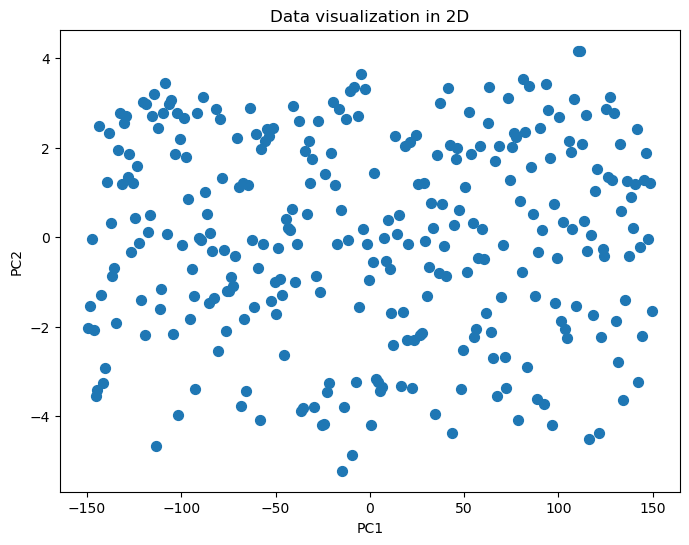

In [112]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(df_pca2[:,0], df_pca2[:,1], s=50)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Data visualization in 2D")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_pca2)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



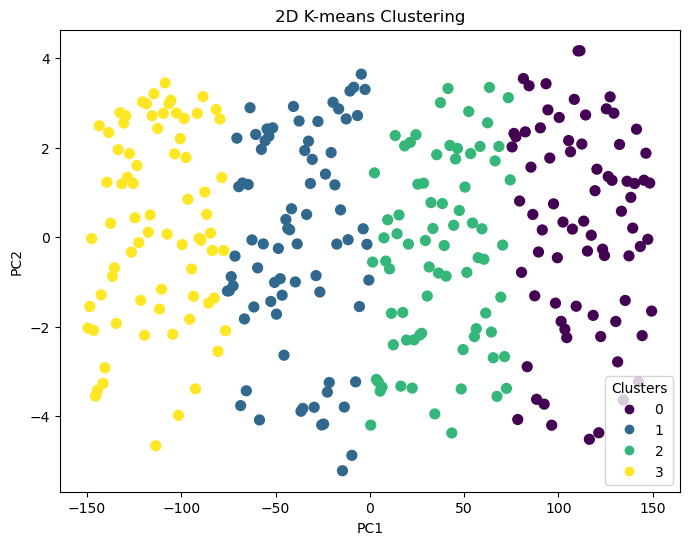

In [114]:

plt.figure(figsize=(8,6))
scatter = plt.scatter(df_pca2[:,0], df_pca2[:,1], c=clusters, s=50)

plt.legend(*scatter.legend_elements(), title="Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D K-means Clustering")
plt.show()


In [115]:
# kmeans on 3d data
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_pca3)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



In [116]:
df_plot = pd.DataFrame(df_pca3, columns=['PC1','PC2','PC3'])

fig = px.scatter_3d(
    df_plot, x='PC1', y='PC2', z='PC3',
    color=clusters, symbol=clusters, opacity=0.8
)

fig.update_layout(title="3D K-means Clusters")
fig.show()


# Task 1
### a) Implement K-Means and test it on the city_lifestyle_dataset

### b) Implement the K-Means++ initialization

Standard K-Means initialization picks centroids completely at random, which can lead to poor convergence. K-Means++ selects the first centroid randomly, but selects subsequent centroids based on a weighted probability distribution.

**1. The Minimum Distance ($D(x)$)**
For every data point $x$, we first calculate the distance to the *nearest* centroid that has already been chosen.

$$D(x) = \min_{c \in \mathcal{C}_{chosen}} || x - c ||$$

The term $|| x - c ||$ represents the Euclidean distance. To calculate this for a dataset with $d$ features (dimensions), we use the following expansion:

$$|| x - c || = \sqrt{\sum_{j=1}^{d} (x_j - c_j)^2}$$

**2. The Selection Probability ($P(x)$)**
We select the next centroid from the remaining data points with a probability proportional to the **square** of the distance $D(x)$.

$$P(x) = \frac{D(x)^2}{\sum_{z \in \mathcal{X}} D(z)^2}$$



**Where:**
* $x$: The current data point we are evaluating.
* $\mathcal{C}_{chosen}$: The set of centroids that have already been initialized.
* $x_j$ and $c_j$: The specific feature values (dimensions) for the point and the centroid.
* $d$: The total number of features (columns).
* $\mathcal{X}$: The full set of all data points.
* $z$: An iterator variable representing every point in the dataset (used for the summation).

In [117]:
def initialize_centroids_kmeansPlus(X, k):
    
    n_samples, n_features = X.shape
    centroids = np.zeros((k, n_features))
    
    first_idx = np.random.randint(0, n_samples)
    centroids[0] = X[first_idx]
    
    for i in range(1, k):
        dist_sq = np.min(
            np.sum((X[:, np.newaxis, :] - centroids[:i]) ** 2, axis=2),
            axis=1
        )
        
        total = dist_sq.sum()
        if total == 0:
            next_idx = np.random.randint(0, n_samples)
        else:
            probs = dist_sq / total
            next_idx = np.random.choice(n_samples, p=probs)
        
        centroids[i] = X[next_idx]
    
    return centroids


In [ ]:
def kmeans(X, k=3, max_iters=100, tol=1e-4, k_meansPlus=False):
    """
    X: np.array containing the dataset
    k: no of clusters
    tol: tolerance for changing the centroids
    """
    
    n_samples, n_features = X.shape
    
    if k_meansPlus:
        centroids = initialize_centroids_kmeansPlus(X, k)
    else:
        random_indices = np.random.choice(n_samples, k, replace=False)
        centroids = X[random_indices]

    labels = np.zeros(n_samples, dtype=int)
    
    for iteration in range(max_iters):
     
        for i in range(n_samples):
            distances = np.linalg.norm(X[i] - centroids, axis=1)
            labels[i] = np.argmin(distances)
        
        new_centroids = np.zeros((k, n_features))
        for j in range(k):
            points_in_cluster = X[labels == j]
            if len(points_in_cluster) > 0:
                
                new_centroids[j] = points_in_cluster.mean(axis=0)
            else:
                rand_idx = np.random.randint(0, n_samples)
                new_centroids[j] = X[rand_idx]
        
        if np.linalg.norm(new_centroids - centroids) < tol:
            print(f"Converged after {iteration+1} iterations")
            centroids = new_centroids
            break
        
        centroids = new_centroids
    
    return labels, centroids


Converged after 20 iterations


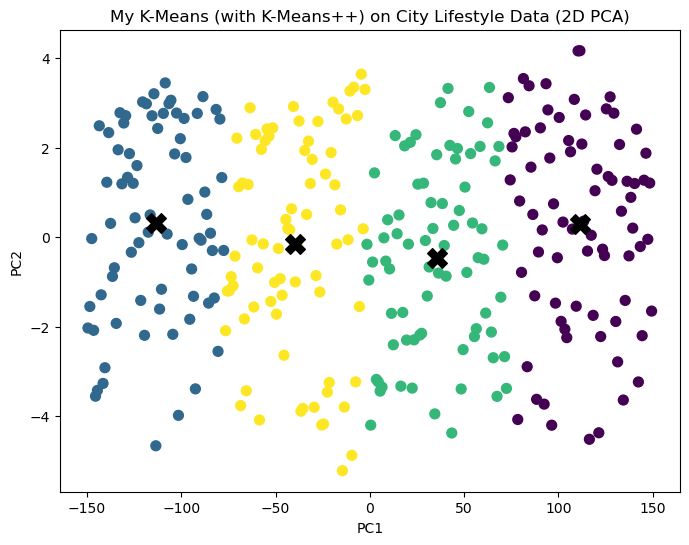

In [ ]:

X_city = df_pca2

labels_city, centroids_city = kmeans(X_city, k=4, max_iters=100, k_meansPlus=True)

plt.figure(figsize=(8, 6))
plt.scatter(X_city[:, 0], X_city[:, 1], c=labels_city, s=50)
plt.scatter(centroids_city[:, 0], centroids_city[:, 1], marker='X', color='black', s=200)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("My K-Means (with K-Means++) on City Lifestyle Data (2D PCA)")
plt.show()



# Task 2
Determine the optimal number of clusters $k$ for the provided dataset. To do this, implement the Elbow Method by calculating the Within-Cluster Sum of Squares (WCSS) for a range of $k$ values (e.g., 2 to 10). Plot the results and identify the inflection point where the reduction in variance becomes marginal.

WCSS formula:
$$ WCSS = \sum_{i=1}^{k} \sum_{j=1}^{n_i} || x_j^{(i)} - c_i ||^2 $$

Useful resource: https://www.geeksforgeeks.org/machine-learning/elbow-method-for-optimal-value-of-k-in-kmeans/

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

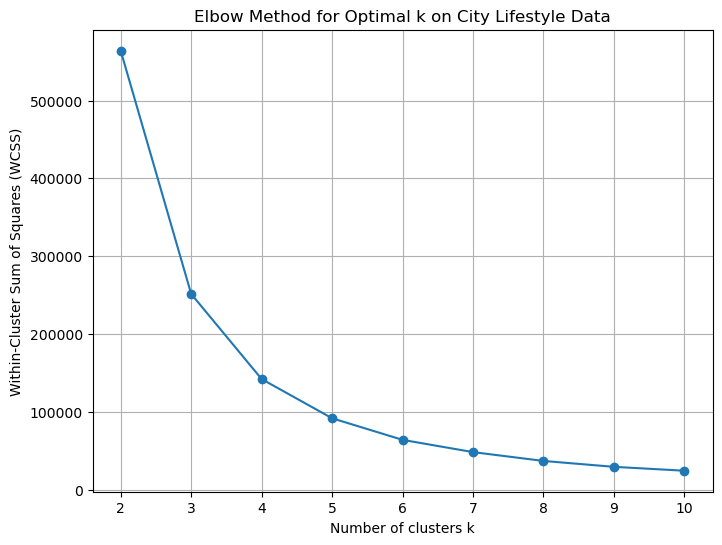

In [ ]:
from sklearn.cluster import KMeans

wcss = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(df_pca2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker="o")
plt.xlabel("Number of clusters k")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal k on City Lifestyle Data")
plt.xticks(k_values)
plt.grid(True)
plt.show()
